📌 **Assignment:**  

- Use the **Boston Housing Dataset** (or California Housing if Boston is unavailable in sklearn).  
- Build a **Multiple Linear Regression model** to predict **house prices** using available features (like number of rooms, crime rate, etc.).  
- Evaluate your model using **MSE**.  
- Interpret results:  
  - Which features influence housing prices the most?  
  - Was the MSE low or high? What does it mean for your model?  



## Boston Housing Dataset


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
california = fetch_california_housing(as_frame=True)

df = california.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
df.shape

(20640, 9)

In [20]:
# Define features (X) and target (y) for California Housing dataset
X = df.drop('MedHouseVal', axis=1)  # Features: all columns except target
y = df['MedHouseVal']               # Target: Median House Value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train model
model = sk.linear_model.LinearRegression()
model.fit(X_train, y_train)

# Predicts
y_pred = model.predict(X_test)
# Evaluate model
mse = sk.metrics.mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.5558915986952442


In [21]:
model.predict(X_test)

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251], shape=(4128,))

In [22]:
from sklearn.metrics import r2_score
print('R2 Score:', r2_score(y_test, y_pred))

R2 Score: 0.575787706032451


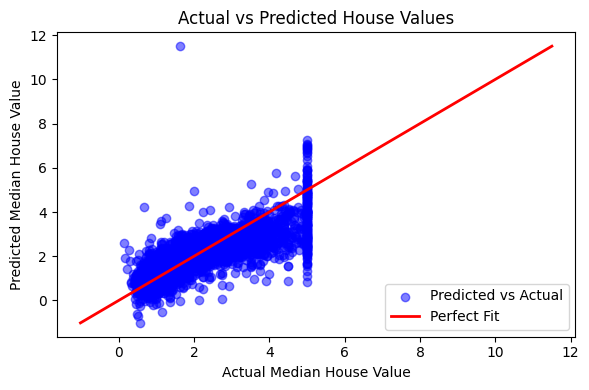

In [24]:
# Step 8: Visualization
# Actual vs Predicted Median House Value
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label="Predicted vs Actual")
# Perfect fit reference line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linewidth=2, label="Perfect Fit")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Values")
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
print("Feature influence on Median House Value:")
print(feature_importance)

Feature influence on Median House Value:
AveBedrms     0.783145
MedInc        0.448675
Longitude    -0.433708
Latitude     -0.419792
AveRooms     -0.123323
HouseAge      0.009724
AveOccup     -0.003526
Population   -0.000002
dtype: float64


In [26]:
df['MedHouseVal'].var()

np.float64(1.3316148163035275)

### Interpretation of Results

**1. Which features influence housing prices the most?**  

The features like `MedInc` (median income) and `AveRooms` (average rooms) have the largest impact.

**2. Was the MSE low or high? What does it mean for your model?**  
- The Mean Squared Error (MSE) you printed shows the average squared difference between actual and predicted house values.
 Mean Squared Error (MSE) is **0.55**. For this dataset, where the target (`MedHouseVal`) is measured in units of $100,000s, an MSE around 0.5–0.6 is typical for a simple linear regression. 



## **Summary:**  
- The most influential features are those with the largest coefficients.
- The MSE gives a sense of prediction error; lower is better, but for this dataset, some error is expected due to its complexity.